# Identify customer segments for online retail with the use of K-means clustering

#### K-means clustering helps online retailers group customers based on their shopping habits and preferences.
#### By understanding these segments, businesses can offer personalized experiences and improve customer satisfaction.

## 1. Loading the Data:
Read data from various sources such as CSV files, Excel files, and SQL databases.

In [152]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [154]:
# loading the data
retail_data = pd.read_excel('Online Retail.xlsx', engine='openpyxl')

Since it is a huge dataset while loading it here I'm using [engine='openpyxl'] for optimized file reading

## 2. Understanding the Data:
Explore basic information about the data, including head, info, and descrie..
Check for missing values in the dataset.

In [158]:
# viewing first few rows
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [160]:
# checking the data types and non-null values
print(retail_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [162]:
# Statistical Summary
retail_data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


#### Checking for null/ missing values

In [165]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [167]:
# Checking the number of missing values in each column
print('Number of missing values in each column:', retail_data.isnull().sum())

Number of missing values in each column: InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


#### The Description column contains 1454 null values where CustomerID has around 135080 null values.
#### Let's check the percentage of missing values in these rows to determine whether to drop them or replace them with something else.

In [170]:
# Checking the percentage of missing values
print('Percentage of missing values: ', retail_data.isnull().sum() * 100 / len(retail_data))

Percentage of missing values:  InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


#### The Description column has only 0.2 % of null values.
#### We can see that the CustomerID column has around a quarter of missing values.
#### Also, the CustomerID column is essential to carry out further customer segmentation so it cannot contain null values.
#### Considering the above measures we will drop all the null values.

## 3. Clean the Data:
Handle missing values by either dropping or filling them.<br/>
Remove duplicate entries in the dataset.<br/>
Correct data types as necessary.

### Handling missing values

In [175]:
# dropping the missing values 
retail_data.dropna(inplace = True)

In [177]:
# resetting the indexes
retail_data.reset_index(drop = True, inplace = True)

#### Let's check the data again 

In [180]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [182]:
# Also check if our data has null values in it
print('Number of null values in each column:', retail_data.isnull().sum())

Number of null values in each column: InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


### Correcting the data types where necessary

In [185]:
# changing the data type of CustomerID from float to integer for efficiency
retail_data['CustomerID'] = retail_data['CustomerID'].astype('int64')

In [187]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


### Checking for outliers

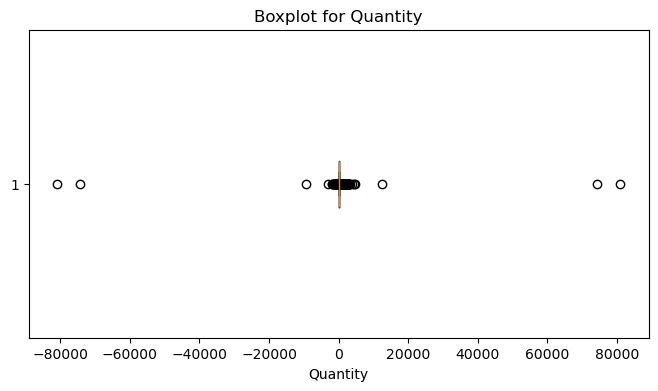

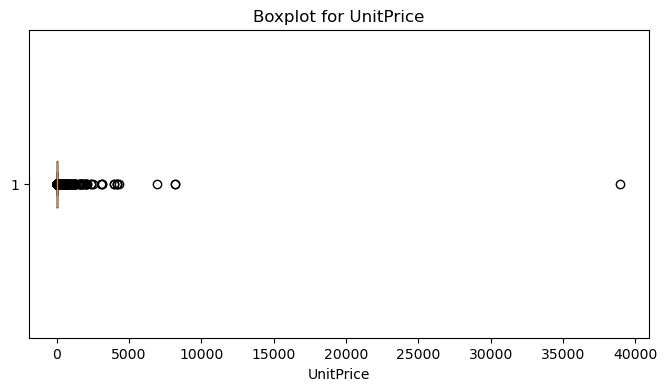

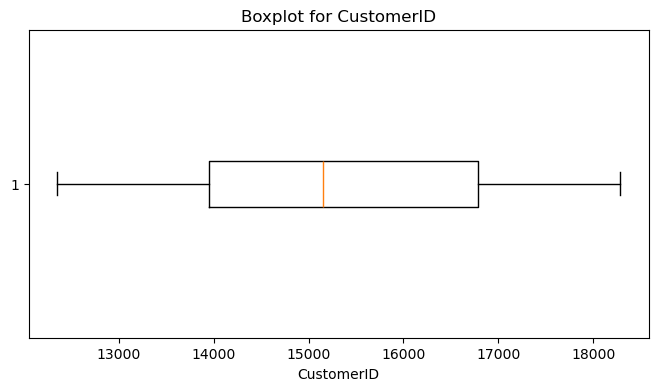

In [190]:
# Visualize data using boxplots
numerical_columns = retail_data.select_dtypes(include=['float', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(retail_data[col], vert=False)
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.show()

#### Detecting outliers using Z-scores

In [193]:
from scipy.stats import zscore

In [195]:
# Calculating Z-scores for numerical columns
z_scores = np.abs(zscore(retail_data[numerical_columns]))

In [197]:
# Threshold for identifying outliers
threshold = 3
outliers_z = (z_scores > threshold)

In [199]:
# Getting rows with outliers
outlier_rows_z = retail_data[(outliers_z).any(axis=1)]
print(f"Number of outliers detected using Z-scores: {outlier_rows_z.shape[0]}")

Number of outliers detected using Z-scores: 337


#### Detecting outliers using IQR

In [202]:
outlier_indices = []

for col in numerical_columns:
    Q1 = retail_data[col].quantile(0.25)
    Q3 = retail_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = retail_data[(retail_data[col] < lower_bound) | (retail_data[col] > upper_bound)].index
    outlier_indices.extend(outliers)

### Dropping the outliers

In [205]:
outlier_indices = list(set(outlier_indices))

retail_data_cleaned = retail_data.drop(index=outlier_indices)
print(f"Shape of DataFrame after removing outliers: {retail_data_cleaned.shape}")

Shape of DataFrame after removing outliers: (344393, 8)


### Checking for Duplicate values

In [208]:
# checking for duplicate values
print('Number of duplicate rows:', retail_data_cleaned.duplicated().sum())

Number of duplicate rows: 4940


In [210]:
# Identifying the duplicate rows
duplicate_rows = retail_data_cleaned[retail_data_cleaned.duplicated()]
print(duplicate_rows)

       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
406595    581538     22068        BLACK PIRATE TREASURE CHEST         1   
406609    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
406612    581538     22992             REVOLVER WOODEN RULER          1   
406619    581538     22694                       WICKER STAR          1   
406621    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country  
517    2010-12-01 11:45:00     

#### As we can see the duplicates are not actually duplicates but different products bought by the same customer.
#### So we will not drop the duplicates as it is a valuable data for customer behavior analysis.
#### But there's another way to handle these duplicates and the solution is by using groupby() and agg() methods.

In [213]:
# Since we are going to perform customer segmentation we will use groupby on 'CustomerID'
# We also need aggregate of columns 'Quantity', 'UnitPrice', 'InvoiceNo' and 'Stockcode' to derive the total revenue by one customer
aggregated_data = retail_data_cleaned.groupby('CustomerID').agg({
    'Quantity': 'sum',              # Total quantity of items purchased
    'UnitPrice': 'mean',            # Average unit price
    'InvoiceNo': 'nunique',         # Number of unique transactions
    'StockCode': 'nunique',          # Number of unique products
}).reset_index()

In [215]:
# Rename columns for clarity
aggregated_data.rename(columns={
    'Quantity': 'TotalQuantity',
    'UnitPrice': 'AveragePrice',
    'InvoiceNo': 'TransactionCount',
    'StockCode': 'UniqueProducts'
}, inplace=True)

In [217]:
# Adding new column 'TotalRevenue' to the newly created dataset named aggregated_data
aggregated_data['TotalRevenue'] = aggregated_data['TotalQuantity'] * aggregated_data['AveragePrice']

In [219]:
# Let's check few rows of aggregated_data
aggregated_data.head()

,CustomerID,TotalQuantity,AveragePrice,TransactionCount,UniqueProducts,TotalRevenue
0,12347,1893,2.348976,7,96,4446.611386
1,12348,140,0.650000,3,6,91.000000
2,12349,523,2.607759,1,58,1363.857759
3,12350,196,1.581250,1,16,309.925000
4,12352,437,3.054110,8,49,1334.645890


## 4. Transform the Data:
Normalize or standardize the data<br/>
Encode categorical variables.

#### Normalizing or Standardizing the Data 

In [223]:
# Let's import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

In [225]:
# Selecting features for clustering
features = ['TotalQuantity', 'AveragePrice', 'TransactionCount', 'UniqueProducts', 'TotalRevenue']

In [227]:
# Standardizing the features
scaler = StandardScaler()
normalized_data = scaler.fit_transform(aggregated_data[features])

In [229]:
# Converting back to a DataFrame for convenience
normalized_df = pd.DataFrame(normalized_data, columns=features)
print(normalized_df.head())

   TotalQuantity  AveragePrice  TransactionCount  UniqueProducts  TotalRevenue
0       1.043605      0.022443          0.288905        0.534722      1.117534
1      -0.364545     -2.194782         -0.195414       -0.642213     -0.430131
2      -0.056889      0.360164         -0.437573        0.037794      0.022150
3      -0.319561     -0.979467         -0.437573       -0.511442     -0.352341
4      -0.125971      0.942668          0.409985       -0.079900      0.011770


#### Standardization (z-score scaling) centers data around 0 with a standard deviation of 1.
#### Since aggregated_data is already numeric and doesn't include categorical variables like Country, we can skip encoding.

## 5. Feature Engineering:
Create new features based on existing ones.
<br/>
Perform feature selection to identify the most relevant features.

#### Creating new features

### 5.1 Recency
Calculating the number of days since the customer’s last transaction

In [237]:
# Finding the last purchase date for each customer
latest_date = retail_data['InvoiceDate'].max()
retail_data['Recency'] = (latest_date - retail_data['InvoiceDate']).dt.days

# Aggregating Recency to get the minimum (last transaction) for each customer
recency_data = retail_data.groupby('CustomerID')['Recency'].min().reset_index()

### 5.2 Frequency
Counting the number of transactions made by each customer

In [240]:
frequency_data = retail_data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_data.rename(columns={'InvoiceNo': 'TransactionCount'}, inplace=True)

### 5.3 Revenue
Calculating the total revenue for each customer

In [243]:
# Creating a new feature for total revenue per transaction
retail_data['Revenue'] = retail_data['Quantity'] * retail_data['UnitPrice']

# Aggregating total revenue by customer
revenue_data = retail_data.groupby('CustomerID')['Revenue'].sum().reset_index()

### 5.4 Average Quantity per Transaction
Calculating the average quantity purchased by a customer in a single transaction

In [246]:
avg_quantity = retail_data.groupby('CustomerID')['Quantity'].mean().reset_index()
avg_quantity.rename(columns={'Quantity': 'AvgQuantityPerPurchase'}, inplace=True)

#### Merging all the features

In [249]:
# Merging all customer-level features into one DataFrame
customer_features = recency_data.merge(frequency_data, on='CustomerID')
customer_features = customer_features.merge(revenue_data, on='CustomerID')
customer_features = customer_features.merge(avg_quantity, on='CustomerID')

#### Feature Selection

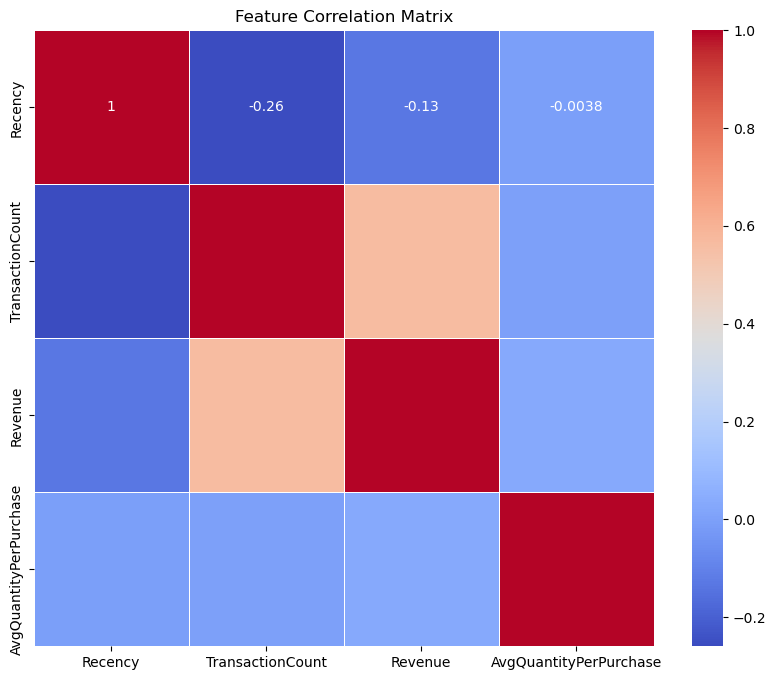

In [252]:
# Droping features that don't carry meaningful numerical information
data_for_clustering = customer_features.drop(columns=['CustomerID'], axis=1)

# Checking for correlation using correlation matrix
import seaborn as sns

# Computing correlation matrix
correlation_matrix = data_for_clustering.corr()

# Identifying Highly Correlated Feature
correlation_threshold = 0.9   # adjusting threshold as needed
correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j])>correlation_threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

#### Feature Selection Summary:
#### - Correlation matrix computed to identify relationships between features.
#### - Highly correlated features (above threshold) were identified and removed to avoid redundancy.
#### - The remaining features are now independent and suitable for clustering.
#### - The final dataset is ready for K-means clustering analysis.

In [255]:
# Saving the final dataset (after feature selection) for further analysis
data_for_clustering.to_csv('data_for_clustering_final.csv', index=False)